Opracowanie bezrobocia

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Text(0, 0.5, 'y - liczba bezrobotnych osób / stopa procentowa')

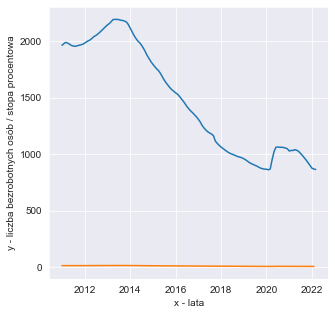

In [2]:
plik = 'daneBezrobocia.csv'
#podzieliłam pliki na dwa, ponieważ miałam problem z uzyskaniem podwójnego filtrowania przy danych bezpośrednio odnoszących się do Covid19 (filtr - data, filtr - nazwa_zmiennej), poza tym prawdopodobnie stopy procentowe nie będą mi potrzebne, ponieważ będą reprezentować te same dane i te same wykresy, co liczba osób bezrobotnych, poniżej zamieszaczam dwa wykresy do porównania
stopaP = 'daneBezrobocieStopyP.csv'

daneS = pd.read_csv(stopaP, sep=";")
dane = pd.read_csv(plik, sep=";")

Y = dane['wartosc'].values
Y = pd.to_numeric(Y)

Y_stopyP = daneS['wartosc'].values
Y_stopyP = pd.to_numeric(Y_stopyP)

X = dane['data'].values
X = pd.to_datetime(X,format='%m-%Y')
X_stopyP = daneS['data'].values
X_stopyP = pd.to_datetime(X_stopyP,format='%m-%Y')

plt.figure(figsize=(5,5))
plt.plot(X, Y)
plt.plot(X_stopyP, Y_stopyP, color='tab:orange')
plt.xlabel('x - lata', fontsize=10)
plt.ylabel('y - liczba bezrobotnych osób / stopa procentowa', fontsize=10)

Funkcja przedstawiająca zależność ilości osób bezrobotnych  od roku

Text(0, 0.5, 'y - stopa procentowa')

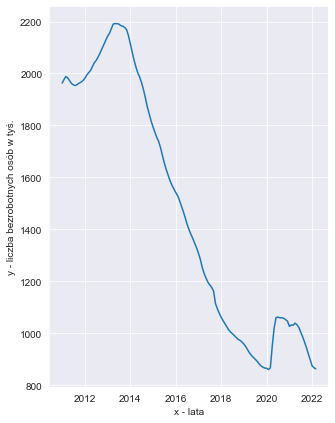

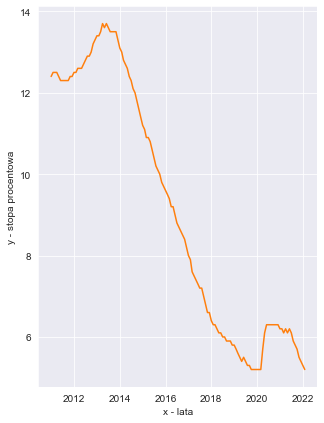

In [3]:
plt.figure(figsize=(5,7))
plt.plot(X, Y)
plt.xlabel('x - lata', fontsize=10)
plt.ylabel('y - liczba bezrobotnych osób w tyś.', fontsize=10)

plt.figure(figsize=(5,7))
plt.plot(X_stopyP, Y_stopyP,  color='tab:orange')
plt.xlabel('x - lata', fontsize=10)
plt.ylabel('y - stopa procentowa', fontsize=10)

Odnosząc sie do tego, co wyżej napisłam wykresy przedstawiają dokładnie to samo, więc przy opracowniu danych skupię się tylko na liczbie osób bezrobotnych.

Teraz dane zostaną przedstawione w postaci punktów, aby można było do nich dopasować funkcję

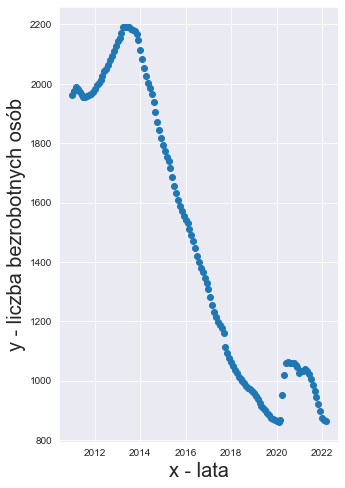

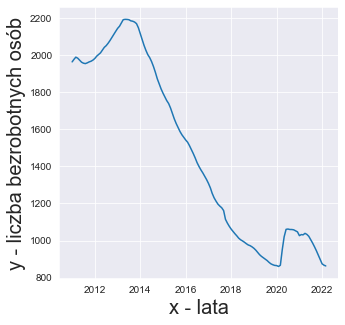

In [4]:
plt.figure(figsize=(5,8))
plt.scatter(X,Y)
plt.xlabel('x - lata', fontsize=20)
plt.ylabel('y - liczba bezrobotnych osób', fontsize=20)
plt.show()

plt.figure(figsize=(5,5))
plt.plot(X,Y)
plt.xlabel('x - lata', fontsize=20)
plt.ylabel('y - liczba bezrobotnych osób', fontsize=20)
plt.show()

Statystyki

In [5]:
print(np.mean(Y))
print(np.median(Y))


1473.5755555555556
1399.5


Funkcja przedstawia zależność osób bezrobotnych od okresu Covid-19.

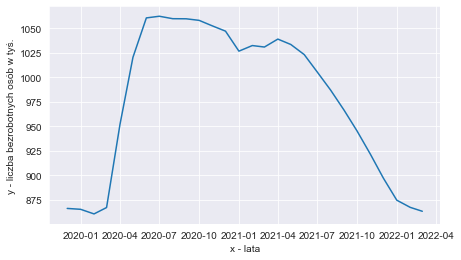

In [6]:
X1 = dane['data'].values
X_covid = X1[pd.to_datetime(X1,format='%m-%Y') >= '2019-12-01']
X_covid = pd.to_datetime(X_covid,format='%m-%Y')



Y2 = dane['wartosc'].values
Y2 = pd.to_numeric(Y2)
Y_covid = Y2[pd.to_datetime(X1,format='%m-%Y') >= '2019-12-01']

plt.figure(figsize=(7,4))
plt.plot(X_covid, Y_covid)
plt.xlabel('x - lata', fontsize=10)
plt.ylabel('y - liczba bezrobotnych osób w tyś.', fontsize=10)
plt.show()



Dopasowanie do danych modelu liniowego

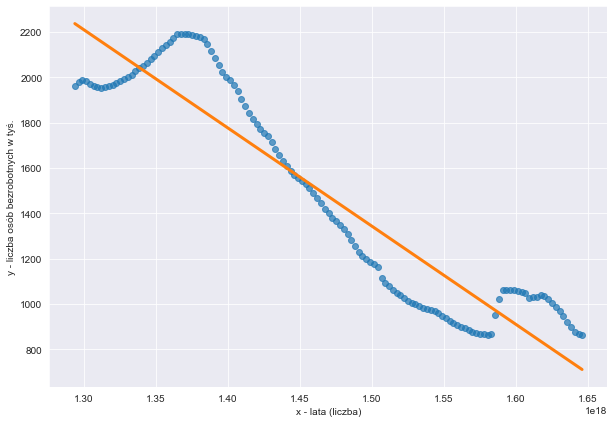

In [7]:
X_number = pd.to_numeric(X)

model_lin = LinearRegression()
model_lin.fit(np.reshape(X_number, (-1,1)), Y)
X_test = np.linspace(start=X_number.min(), stop=X_number.max(), num=50)
Y_pred = model_lin.predict(X_test.reshape(-1,1))

plt.figure(figsize=(10,7))
plt.scatter(X_number,Y, alpha=0.7)
plt.plot(X_test, Y_pred, color='tab:orange', linewidth=3)
plt.xlabel('x - lata (liczba)',  fontsize=10)
plt.ylabel('y - liczba osób bezrobotnych w tyś.',  fontsize=10)
plt.show()


Dopasowanie do danych różnych modeli

Parametry modelu liniowego: [-0.], 7962.49902
Błąd średniokwadratowy modelu liniowego: 2.64e+04

Parametry modelu GLM: [ 0.  0. -0.], 4742.97358
Błąd średniokwadratowy modelu GLM: 2.81e+04

Parametry modelu regresji: [-0.], 7962.49902
Błąd średniokwadratowy modelu regresji: 2.64e+04


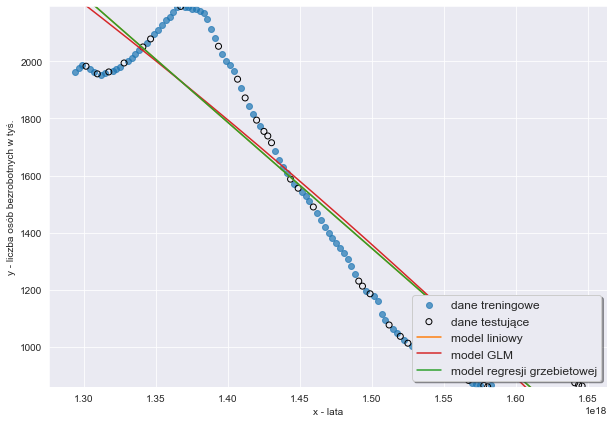

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X_number, Y, test_size=0.3)



from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(np.reshape(X_train,(-1,1)),
              Y_train)
print(f'Parametry modelu liniowego: {np.round(model_lin.coef_,5)}, {np.round(model_lin.intercept_,5)}')
MSE_lin = mean_squared_error(Y_test, model_lin.predict(np.reshape(X_test, (-1,1))))
print(f'Błąd średniokwadratowy modelu liniowego: {MSE_lin:0.3}\n')


from sklearn.preprocessing import PolynomialFeatures
model_GLM = LinearRegression()
gen_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
model_GLM.fit(gen_features.fit_transform(np.reshape(X_train,(-1,1))),
              Y_train)
print(f'Parametry modelu GLM: {np.round(model_GLM.coef_,4)}, {np.round(model_GLM.intercept_,5)}')
MSE_GLM = mean_squared_error(Y_test, model_GLM.predict(gen_features.fit_transform(np.reshape(X_test,(-1,1)))))
print(f'Błąd średniokwadratowy modelu GLM: {MSE_GLM:0.3}\n')


from sklearn import linear_model
model_reg = linear_model.Ridge(alpha=.5)
model_reg.fit(np.reshape(X_train, (-1,1)),
              Y_train)
MSE_reg = mean_squared_error(Y_test, model_reg.predict(np.reshape(X_test,(-1,1))))
print(f'Parametry modelu regresji: {np.round(model_lin.coef_,5)}, {np.round(model_lin.intercept_,5)}')
print(f'Błąd średniokwadratowy modelu regresji: {MSE_reg:0.3}')



os_x = np.linspace(start=X_number.min(), stop=X_number.max(), num=300)
y_lin_pred = model_lin.predict(np.reshape(os_x,(-1,1)))
y_GLM_pred = model_GLM.predict(gen_features.fit_transform(np.reshape(os_x,(-1,1))))
y_reg_pred = model_reg.predict(np.reshape(os_x,(-1,1)))

plt.figure(figsize=(10,7))
plt.scatter(X_train, Y_train, label='dane treningowe', alpha=0.7)
plt.scatter(X_test, Y_test, edgecolor='black', facecolor='none', label='dane testujące')
plt.plot(os_x, y_lin_pred, label='model liniowy', color='tab:orange')
plt.plot(os_x, y_GLM_pred, label=f'model GLM', color='tab:red')
plt.plot(os_x, y_reg_pred, label='model regresji grzebietowej', color='tab:green')
plt.xlabel(dane.columns[0], fontsize=14)
plt.ylabel(dane.columns[1], fontsize=14)
plt.legend(fontsize=12, shadow=True, loc='lower right')
plt.ylim([Y.min()-0.1, Y.max()+0.5])
plt.xlabel('x - lata',  fontsize=10)
plt.ylabel('y - liczba osób bezrobotnych w tyś.',  fontsize=10)
plt.show()

Dopasowanie do danych Covid-19 modelu funkcji kwadratowej

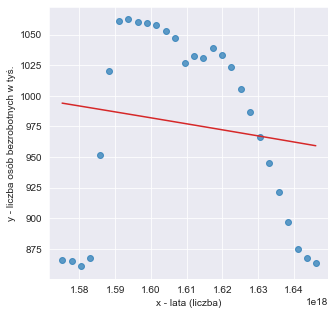

In [9]:
X_covidN = pd.to_numeric(X_covid)
from sklearn.preprocessing import PolynomialFeatures
model_GLM = LinearRegression()
gen_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
model_GLM.fit(gen_features.fit_transform(np.reshape(X_covidN,(-1,1))),
              Y_covid)
os_x = np.linspace(start=X_covidN.min(), stop=X_covidN.max(), num=100)
y_GLM_pred = model_GLM.predict(gen_features.fit_transform(np.reshape(os_x,(-1,1))))
plt.figure(figsize=(5,5))
plt.scatter(X_covidN,Y_covid, alpha=0.7)
plt.plot(os_x, y_GLM_pred, label=f'model GLM', color='tab:red')
plt.xlabel('x - lata (liczba)',  fontsize=10)
plt.ylabel('y - liczba osób bezrobotnych w tyś.',  fontsize=10)
plt.show()

Dopasowanie do danych Covid-19 różnych modeli

Parametry modelu liniowego: [-0.], 3291.39906
Błąd średniokwadratowy modelu liniowego: 1.33e+04

Parametry modelu GLM: [ 0.  0. -0.], 2155.63552
Błąd średniokwadratowy modelu GLM: 1.33e+04

Błąd średniokwadratowy modelu SVR: 1.45e+04


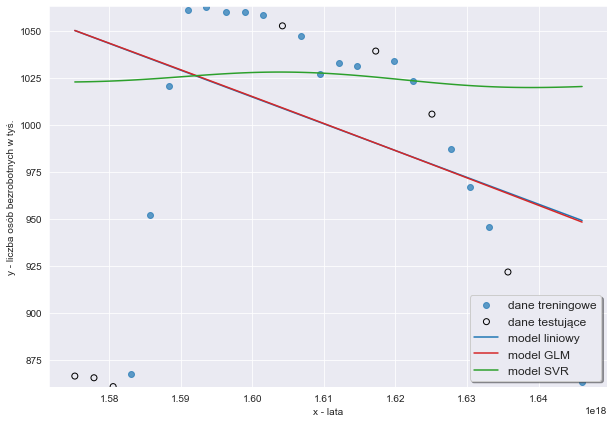

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_covidN, Y_covid, test_size=0.3)


from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(np.reshape(X_train,(-1,1)),
              Y_train)
print(f'Parametry modelu liniowego: {np.round(model_lin.coef_,5)}, {np.round(model_lin.intercept_,5)}')
MSE_lin = mean_squared_error(Y_test, model_lin.predict(np.reshape(X_test, (-1,1))))
print(f'Błąd średniokwadratowy modelu liniowego: {MSE_lin:0.3}\n')

from sklearn.preprocessing import PolynomialFeatures
model_GLM = LinearRegression()
gen_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
model_GLM.fit(gen_features.fit_transform(np.reshape(X_train,(-1,1))),
              Y_train)
print(f'Parametry modelu GLM: {np.round(model_GLM.coef_,4)}, {np.round(model_GLM.intercept_,5)}')
MSE_GLM = mean_squared_error(Y_test, model_GLM.predict(gen_features.fit_transform(np.reshape(X_test,(-1,1)))))
print(f'Błąd średniokwadratowy modelu GLM: {MSE_GLM:0.3}\n')

from sklearn.svm import SVR
model_svr = SVR(kernel='rbf', gamma='scale', C=1)
model_svr.fit(np.reshape(X_train, (-1,1)),
              Y_train)
MSE_SVR = mean_squared_error(Y_test, model_svr.predict(np.reshape(X_test, (-1,1))))
print(f'Błąd średniokwadratowy modelu SVR: {MSE_SVR:0.3}')


os_x = np.linspace(start=X_covidN.min(), stop=X_covidN.max(), num=100)
y_lin_pred = model_lin.predict(np.reshape(os_x,(-1,1)))
y_GLM_pred = model_GLM.predict(gen_features.fit_transform(np.reshape(os_x,(-1,1))))
y_svr_pred = model_svr.predict(np.reshape(os_x,(-1,1)))


plt.figure(figsize=(10,7))
plt.scatter(X_train, Y_train, label='dane treningowe', alpha=0.7)
plt.scatter(X_test, Y_test, edgecolor='black', facecolor='none', label='dane testujące')
plt.plot(os_x, y_lin_pred, label='model liniowy', color='tab:blue')
plt.plot(os_x, y_GLM_pred, label=f'model GLM', color='tab:red')
plt.plot(os_x, y_svr_pred, label=f'model SVR', color='tab:green')
plt.xlabel(dane.columns[0])
plt.ylabel(dane.columns[1])
plt.legend(fontsize=12, shadow=True, loc='lower right')
plt.ylim([Y_covid.min()-0.1, Y_covid.max()+0.5])
plt.xlabel('x - lata', fontsize=10)
plt.ylabel('y - liczba osób bezrobotnych w tyś.', fontsize=10)
plt.show()

Rozkład normalny

Okres 2011-2022 1473.5755555555556 476.74620695597946
Covid-19 976.7571428571428 76.15570248122043


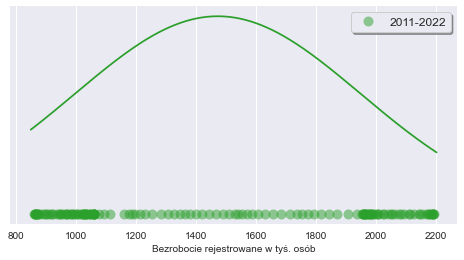

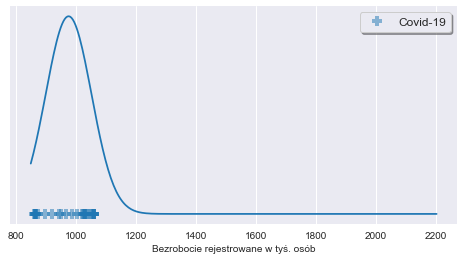

In [11]:
def rozklad_norm(parametry, x):
    mu, sigma = parametry
    return np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))

os_x = np.linspace(Y.min()-10, Y.max()+10, num=300)

mu_wszyscy, sigma_wszyscy = np.mean(Y), np.std(Y)
mu_covid, sigma_covid = np.mean(Y_covid), np.std(Y_covid)
os_y_wszyscy = rozklad_norm([mu_wszyscy, sigma_wszyscy], os_x)
os_y_covid = rozklad_norm([mu_covid, sigma_covid], os_x)
print("Okres 2011-2022",mu_wszyscy,sigma_wszyscy)
print("Covid-19",mu_covid, sigma_covid)
with plt.style.context('seaborn'):
    plt.figure(figsize=(8,4))
    plt.plot(Y, np.zeros_like(Y), 'o',
             markersize=10, alpha=0.5, markerfacecolor='tab:green', markeredgecolor='tab:green',
             label='2011-2022')
    plt.plot(os_x, 25*os_y_wszyscy, color='tab:green')
    plt.xlabel("Bezrobocie rejestrowane w tyś. osób", fontsize=10)
    plt.yticks([])
plt.legend(shadow=True, fontsize=12)
plt.show()

with plt.style.context('seaborn'):
    plt.figure(figsize=(8,4))
    plt.plot(Y_covid, np.ones_like(Y_covid), 'P',
             markersize=10, alpha=0.5, markerfacecolor='tab:blue', markeredgecolor='tab:blue',
             label='Covid-19')
    plt.plot(os_x, 25*os_y_covid+1, color='tab:blue')
    plt.xlabel("Bezrobocie rejestrowane w tyś. osób", fontsize=10)
    plt.yticks([])
plt.legend(shadow=True, fontsize=12)
plt.show()





Dopasowanie rozkładu

C:\Users\karol\PycharmProjects\Bezrobocie\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


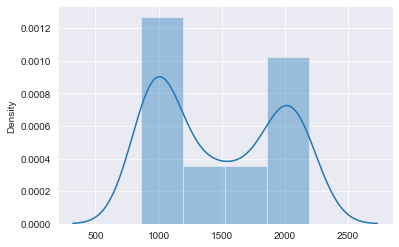

C:\Users\karol\PycharmProjects\Bezrobocie\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


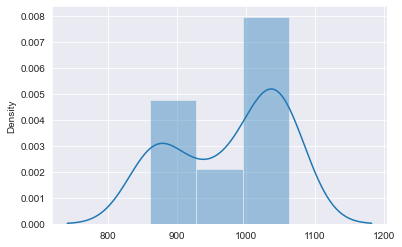

In [12]:
sns.distplot(Y)
plt.show()
sns.distplot(Y_covid)
plt.show()

C:\Users\karol\PycharmProjects\Bezrobocie\venv\lib\site-packages\scipy\integrate\_quadpack_py.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
arcsine,0.000045,1472.420571,-2002.250200,inf
johnsonsb,0.000045,1478.202889,-1992.350564,inf
wrapcauchy,0.000049,1478.349328,-1987.608713,inf
beta,0.000050,1515.510268,-1980.478699,inf
powerlaw,0.000058,1458.126803,-1965.118870,inf


C:\Users\karol\PycharmProjects\Bezrobocie\venv\lib\site-packages\scipy\integrate\_quadpack_py.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


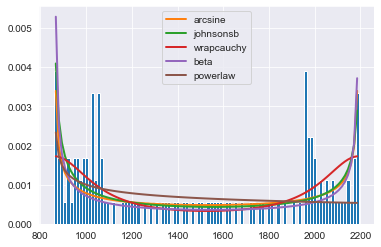

In [13]:
from fitter import Fitter
f = Fitter(Y)
f.fit()
f.summary()


C:\Users\karol\PycharmProjects\Bezrobocie\venv\lib\site-packages\scipy\integrate\_quadpack_py.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
wrapcauchy,0.007025,1148.155544,-222.137444,inf
arcsine,0.007156,1096.587758,-224.952023,inf
rdist,0.007435,1096.997553,-220.550342,inf
gausshyper,0.007670,1110.433481,-209.679716,inf
beta,0.007869,1207.275409,-215.628085,inf


C:\Users\karol\PycharmProjects\Bezrobocie\venv\lib\site-packages\scipy\integrate\_quadpack_py.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


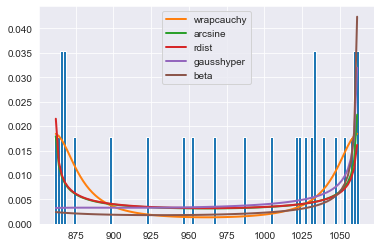

In [14]:
from fitter import Fitter
f = Fitter(Y_covid)
f.fit()
f.summary()

Estymator Parzena

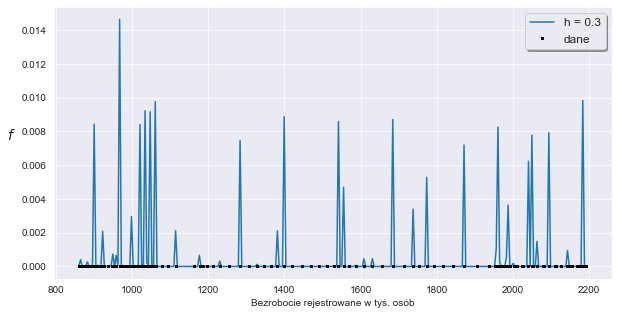

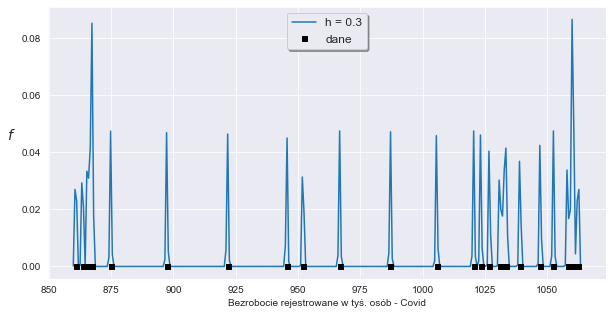

In [15]:
def K(x):
  return np.exp(-x**2/2)/np.sqrt(2*np.pi)
H = [0.3]
os_x = np.linspace(Y.min()-1, Y.max()+1, num=300)
N = Y.size

plt.figure(figsize=(10,5))
for h in H:
  suma = 0
  for nr, pomiar in enumerate(Y):
    suma += K((os_x-pomiar)/h)
    #plt.annotate(r'$x_{}$'.format(nr+1), xy=[Y[nr],0.05], horizontalalignment='center', fontsize=12)
  os_y = suma/(h*N)
  plt.plot(os_x, os_y, label=f'h = {h}')


plt.plot(Y,  np.zeros_like(Y), 's', markersize=2, color='black', label='dane')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$f$', fontsize=14, rotation='horizontal', labelpad=10)
plt.legend(fontsize=12, shadow=True)
plt.xlabel("Bezrobocie rejestrowane w tyś. osób", fontsize=10)
plt.show()


N = Y_covid.size
os_x = np.linspace(Y_covid.min()-1, Y_covid.max()+1, num=300)

plt.figure(figsize=(10,5))
for h in H:
  suma = 0
  for nr, pomiar in enumerate(Y_covid):
    suma += K((os_x-pomiar)/h)
   # plt.annotate(r'$x_{}$'.format(nr+1), xy=[Y_covid[nr],0.05], horizontalalignment='center', fontsize=12)
  os_y = suma/(h*N)
  plt.plot(os_x, os_y, label=f'h = {h}')


plt.plot(Y_covid,  np.zeros_like(Y_covid), 's', markersize=5, color='black', label='dane')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$f$', fontsize=14, rotation='horizontal', labelpad=10)
plt.legend(fontsize=12, shadow=True)
plt.xlabel("Bezrobocie rejestrowane w tyś. osób - Covid", fontsize=10)
plt.show()

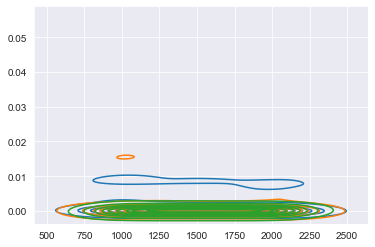

In [16]:
import seaborn as sns
H = [0.3, 0.1, 0.05]
os_x = np.linspace(Y.min()-1, Y.max()+1, num=300)
N = Y.size


for h in H:
  suma = 0
  for pomiar in Y:
    suma += K((os_x-pomiar)/h)
  os_y = suma/(h*N)
  wynik = sns.kdeplot(data=Y, x=os_x, y=os_y, label=f'h = {h}')


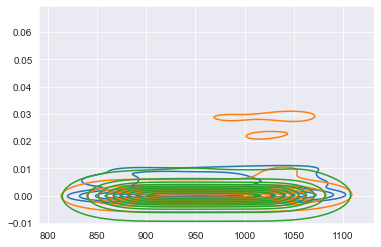

In [17]:
H = [0.3, 0.1, 0.05]
os_x = np.linspace(Y_covid.min()-1, Y_covid.max()+1, num=300)
N = Y.size


for h in H:
  suma = 0
  for pomiar in Y_covid:
    suma += K((os_x-pomiar)/h)
  os_y = suma/(h*N)
  wynik = sns.kdeplot(data=Y_covid, x=os_x, y=os_y, label=f'h = {h}')

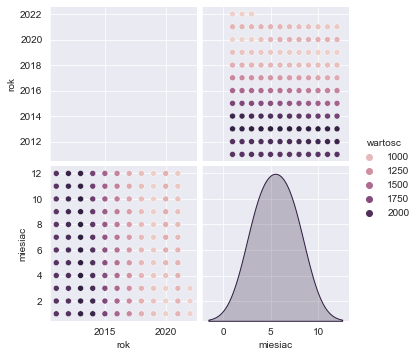

In [18]:
sns.pairplot(dane, hue="wartosc", height=2.5);